# Bandes électroniques

In [82]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine


# Permet d'utiliser l'interface du MP
with MPRester("2r9TvKUOgDsTx87F")as mpr:
    
    # Permet d'obtenir l'objet 'structure' sur le MP
    structure = mpr.get_structure_by_material_id("mp-568690")
    new_s=SpacegroupAnalyzer(structure).get_primitive_standard_structure()
    
    
    # Permet d'obtenir l'objet 'bandstructure' sur le MP
    BS=mpr.get_bandstructure_by_material_id("mp-568690")

La structure des bandes électroniques pour le [CdBr2](https://materialsproject.org/materials/mp-568690/#) dont le graphe montré en dessous, est étudié, en particulier sera déterminé la bande interdite, les extremums pour la dispersion et la masse effective en des points particuliers.

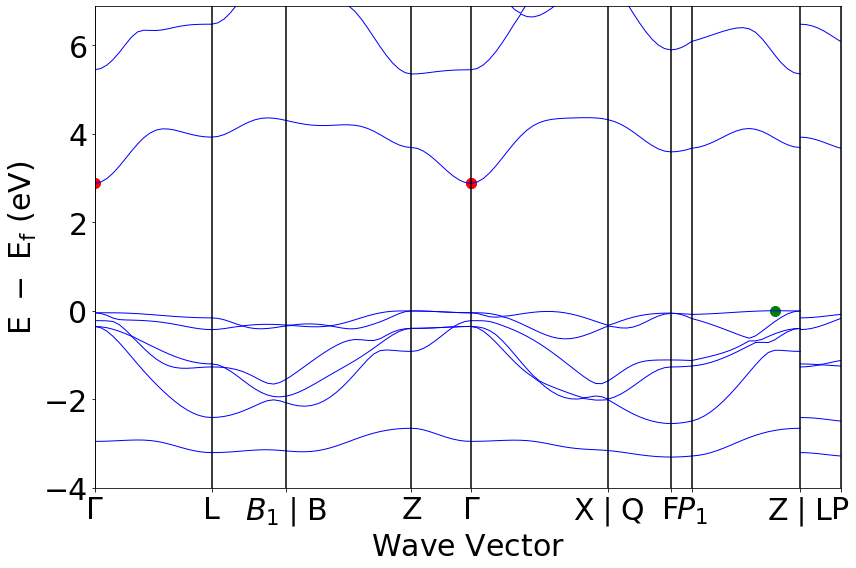

In [84]:
BSPlot=BSPlotter(BS)
Plt=BSPlot.get_plot(vbm_cbm_marker=True)
Plt.show()

## Bande interdite


In [85]:
#Détermine la bande interdite et le type de transition
gap=BS.get_band_gap()
Dir=gap['direct']
Energie=gap['energy']
transition=gap['transition']
print('Energie de la bande interdite:',Energie,'eV')
print('Transition:',transition)

Energie de la bande interdite: 2.8796 eV
Transition: (0.537,0.537,0.426)-\Gamma


La bande interdite est définie comme la différence d'énergie entre le point le plus bas de la bande de conduction et le point le plus haut de la bande de valence, ces deux point sont représentés respectivement en rouge et vert sur le graphe de structure de bande. 

La transition est indirecte puisque les extremas des deux bandes sont assez éloignés l'une de l'autre dans l'espace des vecteurs d'onde, en effet $k_v=(0.537,0.537,0.426)$ pour le bord de la bande de valence et $k_c=(0,0,0)$ pour le bord de la bande de conduction. Donc le seuil d'énergie pour passer d'un état de la bande de valence à la bande de conduction est plus grand que le trou d'énergie $E_g$.

Ce trou d'énergie lui-même vaut $2.88 eV$, de plus vu que la bande de valence est entièrement occupée, le cristal se comporte comme un semi-conducteur.  



